In [3]:
library(anytime)
library(lmerTest)
library(tidyverse)
library(report)
library(xtable)
library(LMERConvenienceFunctions)
library(lme4)
library(ez)
library(rstatix)
library(DescTools)
library(predictmeans)
library(effects)
library(merDeriv)
library(bayesplot)
library(report)
library(ggplot2)
library(BayesFactor)
library(tidyr)
library(lubridate)
round_df <- function(df, digits) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))

  df[,nums] <- round(df[,nums], digits = digits)

  (df)
}

apatheme=theme_bw()+
  theme(panel.grid.major=element_blank(),
        panel.grid.minor=element_blank(),
        panel.border=element_blank(),
        axis.line=element_line(color="black"),
        text=element_text(size=10), #change writing size
        #legend.title=element_blank(),
       legend.position = "top")



Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message:
"package 'tidyverse' was built under R version 4.2.1"
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
Warning message:
"package 'LMERConvenienceFunctions' was built under R version 4.2.1"
Warning message:
"package 'rsta

In [5]:
df <- read.csv("./adaptivedf.csv")
df$PId <- factor(df$PId)
df$AdaptationStatus <- factor(df$AdaptationStatus)
df$BlockNumber <- factor(df$BlockNumber)
#df$EDAMean<-scale(df$EDAMean)
df$EDATonic<-scale(df$EDATonic)
df$SlopeRatioMean<-scale(df$SlopeRatioMean)

In [6]:
df$EDATonicDiff <- df$EDATonicMax - df$EDATonicMin

In [12]:
shapiro.test(df$NBackAccuracy)
summary(aov(df$EDAPhasic ~ BlockNumber + Error(PId/BlockNumber), data = df))
summary


	Shapiro-Wilk normality test

data:  df$NBackAccuracy
W = 0.81097, p-value = 4.574e-11



Error: PId
          Df    Sum Sq   Mean Sq F value Pr(>F)
Residuals 16 0.0004687 2.929e-05               

Error: PId:BlockNumber
            Df    Sum Sq   Mean Sq F value Pr(>F)
BlockNumber  6 0.0001116 1.860e-05   0.613  0.719
Residuals   96 0.0029119 3.033e-05               

new("standardGeneric", .Data = function (object, ...) 
standardGeneric("summary"), generic = "summary", package = "base", 
    group = list(), valueClass = character(0), signature = "object", 
    default = new("derivedDefaultMethod", .Data = function (object, 
        ...) 
    UseMethod("summary"), target = new("signature", .Data = "ANY", 
        names = "object", package = "methods"), defined = new("signature", 
        .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"), skeleton = (new("derivedDefaultMethod", 
        .Data = function (object, ...) 
        UseMethod("summary"), target = new("signature", .Data = "ANY", 
            names = "object", package = "methods"), defined = new("signature", 
            .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"))(object, ...))
<environment: 0x00000253843a13b8>
attr(,"generic")
[1] "summary"
attr(,"generic")attr(,"package")
[1] "base"
attr(,"package")
[1] "base"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "object"
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (object, ...) 
UseMethod("summary")
<bytecode: 0x0000025384382380>
<environment: namespace:base>

Signatures:
        object
target  "ANY" 
defined "ANY" 
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (object, ...) 
UseMethod("summary"), target = new("signature", .Data = "ANY", 
    names = "object", package = "methods"), defined = new("signature", 
    .Data = "ANY", names = "object", package = "methods"), generic = "summary"))(object, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [8]:
res.aov <- aov(EDAPhasic ~ BlockNumber + Error(PId/BlockNumber), data = df)
summary(res.aov)



Error: PId
          Df    Sum Sq   Mean Sq F value Pr(>F)
Residuals 16 0.0004687 2.929e-05               

Error: PId:BlockNumber
            Df    Sum Sq   Mean Sq F value Pr(>F)
BlockNumber  6 0.0001116 1.860e-05   0.613  0.719
Residuals   96 0.0029119 3.033e-05               

In [58]:
df %>% friedman_effsize(EDATonic ~ BlockNumber | PId)


ERROR: Error in apply(y, 1L, rank): dim(X) must have a positive length


ERROR while rich displaying an object: Error in `f()`:
! Insufficient values in manual scale. 7 needed but only 3 provided.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj

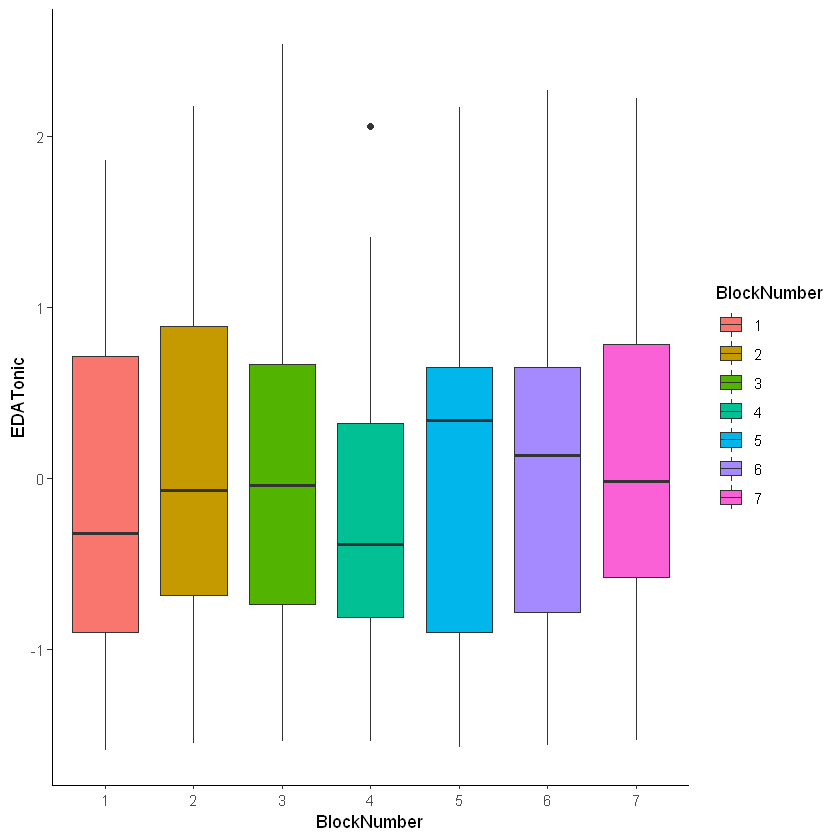

In [11]:
ggplot(df, aes(x = BlockNumber, y = EDATonic, fill=BlockNumber)) + 
    geom_boxplot()+theme_classic()
    #facet_wrap(~NBackN)



In [72]:
shapiro.test(df$EDAPhasic)



	Shapiro-Wilk normality test

data:  df$EDAPhasic
W = 0.21456, p-value < 2.2e-16


In [73]:

mes <- "EDAPhasic"

x <- (df%>%filter(BlockNumber==6))[[mes]] 
y <- (df%>%filter(BlockNumber==7))[[mes]]
wilcox.test(x, y, paired=TRUE)



	Wilcoxon signed rank exact test

data:  x and y
V = 30, p-value = 0.02667
alternative hypothesis: true location shift is not equal to 0


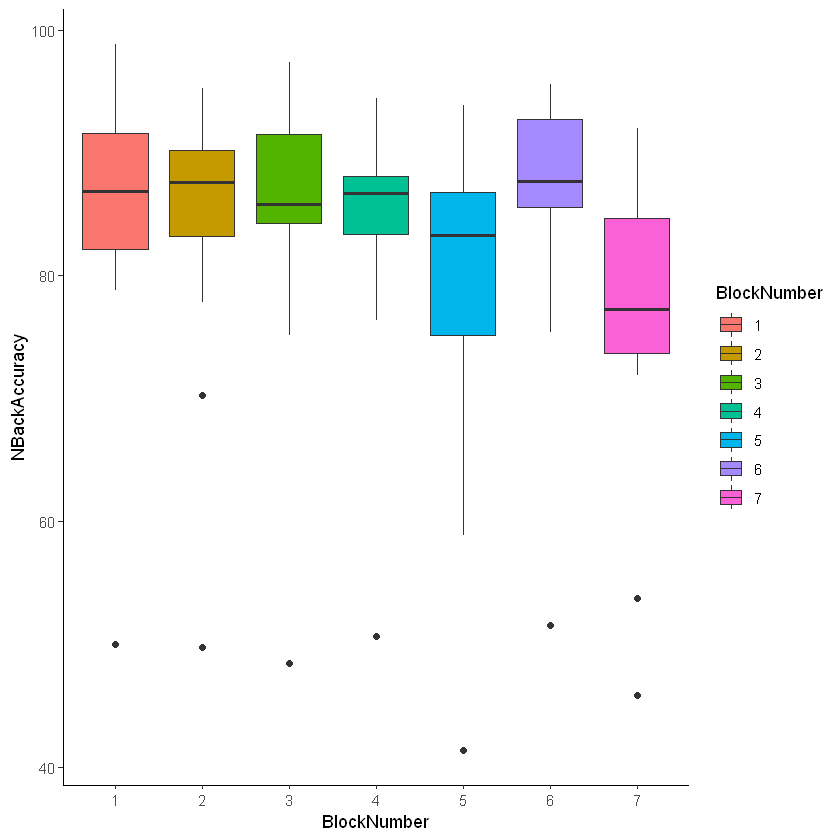

In [70]:
ggplot(df, aes(x = BlockNumber, y = NBackAccuracy, fill=BlockNumber)) + 
    geom_boxplot()+theme_classic()#+ 
    #facet_wrap(~NBackN)

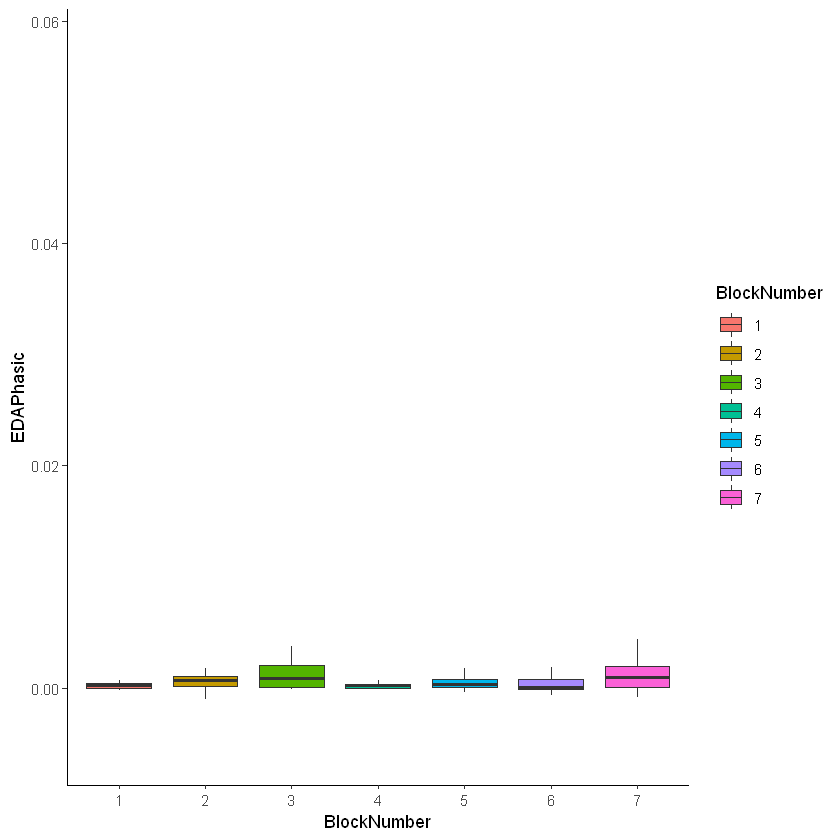

In [19]:
ggplot(df, aes(x = BlockNumber, y = EDAPhasic, fill=BlockNumber)) + 
    geom_boxplot(outlier.shape = NA)+theme_classic()#+ 
    #facet_wrap(~NBackN)

Warning message:
"Removed 3 rows containing missing values (geom_point)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


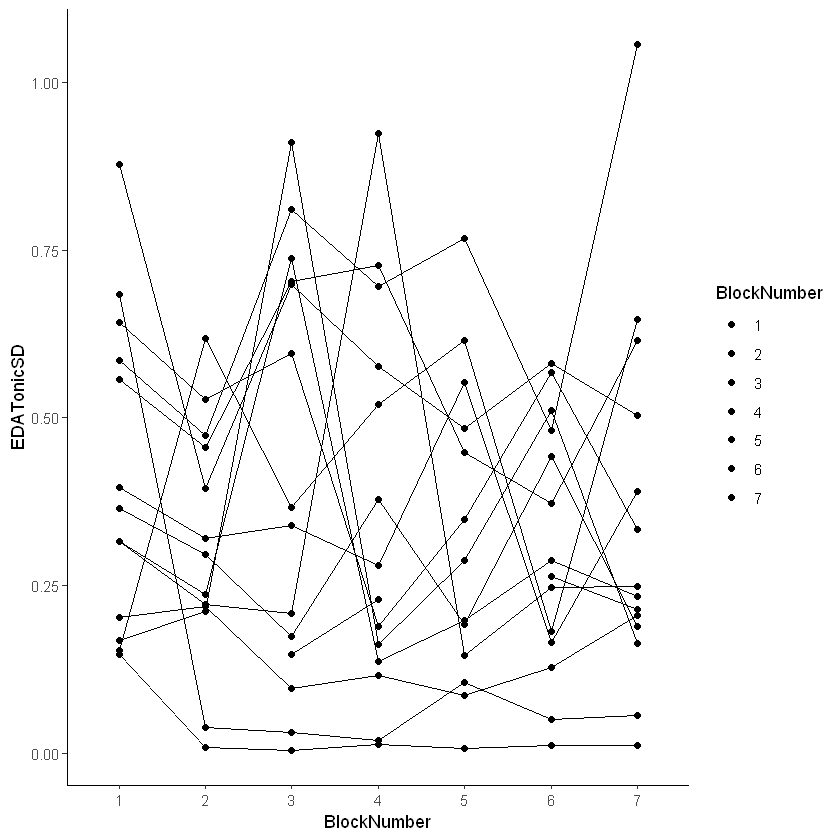

In [8]:
#dfXWL <- df%>%filter(BlockNumber!=1)

ggplot(df, aes(x = BlockNumber, y = EDATonicSD, fill=BlockNumber)) + 
geom_point()+
geom_line(aes(group=PId))+
    theme_classic()#+ 
    #facet_wrap(~NBackN)

In [21]:
mes <- "EDAPhasic"
x <- (df%>%filter(AdaptationStatus==1,BlockNumber==6))[[mes]] 
y <- (df%>%filter(AdaptationStatus==2,BlockNumber==7))[[mes]]
wilcox.test(x, y, paired=TRUE)




	Wilcoxon signed rank exact test

data:  x and y
V = 30, p-value = 0.02667
alternative hypothesis: true location shift is not equal to 0


In [203]:
summary(aov(NBackAccuracy ~ BlockNumber + Error(PId/BlockNumber), data = df))

summary



Error: PId
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 11  11312    1028               

Error: PId:BlockNumber
            Df Sum Sq Mean Sq F value   Pr(>F)    
BlockNumber  6   1279  213.19   7.913 1.93e-06 ***
Residuals   66   1778   26.94                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

new("standardGeneric", .Data = function (object, ...) 
standardGeneric("summary"), generic = "summary", package = "base", 
    group = list(), valueClass = character(0), signature = "object", 
    default = new("derivedDefaultMethod", .Data = function (object, 
        ...) 
    UseMethod("summary"), target = new("signature", .Data = "ANY", 
        names = "object", package = "methods"), defined = new("signature", 
        .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"), skeleton = (new("derivedDefaultMethod", 
        .Data = function (object, ...) 
        UseMethod("summary"), target = new("signature", .Data = "ANY", 
            names = "object", package = "methods"), defined = new("signature", 
            .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"))(object, ...))
<environment: 0x0000023a739c4bb8>
attr(,"generic")
[1] "summary"
attr(,"generic")attr(,"package")
[1] "base"
attr(,"package")
[1] "base"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "object"
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (object, ...) 
UseMethod("summary")
<bytecode: 0x0000023a73a10520>
<environment: namespace:base>

Signatures:
        object
target  "ANY" 
defined "ANY" 
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (object, ...) 
UseMethod("summary"), target = new("signature", .Data = "ANY", 
    names = "object", package = "methods"), defined = new("signature", 
    .Data = "ANY", names = "object", package = "methods"), generic = "summary"))(object, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [204]:
anovaBF(EDATonicSD ~ BlockNumber + PId, data = df, whichRandom = "PId",
    progress=FALSE)

Bayes factor analysis
--------------
[1] BlockNumber + PId : 0.1385879 ±0.32%

Against denominator:
  EDATonicSD ~ PId 
---
Bayes factor type: BFlinearModel, JZS


In [83]:
mes <- "SlopeRatioMean"
x <- (df%>%filter(AdaptationStatus==1,BlockNumber==6))[[mes]] 
y <- (df%>%filter(AdaptationStatus==2,BlockNumber==7))[[mes]]
bf =ttestBF(x, y, paired=TRUE)
bf


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.3306987 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


In [81]:
(df%>%filter(AdaptationStatus==1,BlockNumber==1))[mes] 

EDARaw
<dbl>
6.075241
12.104455
5.675068
3.635810
10.119930
2.106784
1.462244
8.287432
1.524032


In [ ]:
#t_non<-data.frame(coef(summary(model)))[2,]$t.value
#p_non<-data.frame(coef(summary(model)))[2,]$Pr...t..
#print(p_non)
#print(t_non)

model <- lmer(NBackAccuracy ~ Flow + (1|PId), data = df%>%filter(AdaptationStatus==1, BlockNumber!=2)) #to run the model
#model <- lmer(NBackAccuracy ~ Flow + (1|PId), data = df%>%filter(BlockNumber5)) #to run the model

summary(model)


df2<-df%>%filter(BlockNumber==6)#get adaptation values

df_m<-as.data.frame(coef(model)[1])
df_m$PId<-rownames(df_m)

df2<-left_join(df2,df_m,by="PId")

#calculate expected values
df2$intercept<-df2$PId..Intercept.
df2$slope<-df2$PId.Flow
df2$slopeNBackN<-df2$PId.NBackN
df2$slopelowNBackN<-df2$PId.Flow.NBackN
df2$expected <- predict(model, df%>%filter(BlockNumber==6)%>%select(PId,NBackN,Flow))
#x$expected <- x$intercept + x$slope * x$Flow + x$BackLevel * x$slopeBackLevel
# + x$slopeBackLevel* x$slopelowBackLevel + x$slopeBackLevel* x$slopelowBackLevel
df2$actual<-df2[,colnames(df2)=="NBackAccuracy"]#get actual

In [ ]:
df2

In [ ]:
dfX <- gather(df2, condition, measurement, expected:actual, factor_key=TRUE)
#ezANOVA(dfX, dv= measurement, wid = PId, within= condition, between = NBackN)

ezANOVA(dfX, dv= measurement, wid = PId, within= condition)

qplot(x = Flow, y = measurement, color = condition, data = dfX) +
  geom_smooth(method = "lm")



In [ ]:
ggplot(df2,aes(Flow,actual,group=PId,color=PId))+
    geom_line(alpha=.5)+
    geom_segment(data=df2,aes(x = Flow, xend = Flow, y = actual, yend = expected),linetype="dashed")+
    geom_point(data = df2,aes(Flow,actual,color=PId),size=3)+
    geom_point(data = df2,aes(Flow,expected,color=PId),shape=3,size=3)+
    apatheme+
    theme(legend.position="None")+
    #ylab("z-scores of Mean EDA")+
    ylab("Mean Measure")+
    xlab("Stream")+
    #scale_x_continuous(breaks=(seq(20,130,by=20)))+ 
    geom_abline(aes(color = PId, intercept = intercept, slope = slope))+
    facet_wrap(~NBackN)

In [ ]:
df%>%filter(AdaptationStatus==2, NBackN==2)

model <- lmer(NBackAccuracy ~ BlockNumber + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==1)) #to run the model
summary(model)
df1<-df%>%filter(AdaptationStatus==2, NBackN==1)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df1<-left_join(df1,dfX,by="PId")
#calculate expected values
df1$intercept<-df1$PId..Intercept.
df1$slope<-df1$PId.Flow
df1$slopeNBackN<-df1$PId.NBackN
df1$expected <- predict(model, df1%>%select(PId,Flow))
df1$actual<-df1[,colnames(df1)=="NBackAccuracy"]#get actual

model <- lmer(NBackAccuracy ~ BlockNumber + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==2)) #to run the model
summary(model)
df2<-df%>%filter(AdaptationStatus==2, NBackN==2)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df2<-left_join(df2,dfX,by="PId")
#calculate expected values
df2$intercept<-df2$PId..Intercept.
df2$slope<-df2$PId.Flow
df2$slopeNBackN<-df2$PId.NBackN
df2$expected <- predict(model, df2%>%select(PId,Flow))
df2$actual<-df2[,colnames(df2)=="NBackAccuracy"]#get actual

model <- lmer(NBackAccuracy ~ BlockNumber + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==3)) #to run the model
summary(model)
df3<-df%>%filter(AdaptationStatus==2, NBackN==3)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df3<-left_join(df3,dfX,by="PId")
df3$intercept<-df3$PId..Intercept.
df3$slope<-df3$PId.Flow
df3$slopeNBackN<-df3$PId.NBackN
df3$expected <- predict(model, df3%>%select(PId,Flow))
df3$actual<-df3[,colnames(df3)=="NBackAccuracy"]#get actual

x <- rbind(df1, df2)
x <- rbind(x, df3)

## Model for Random adaptation

In [ ]:
df

In [ ]:
#dfXWL <-df%>%filter(AdaptationStatus==1, BlockNumber!=7)
#dfXWL <-df%>%filter( BlockNumber!=1)
head(dfXWL)

ggplot(dfXWL, aes(x = BlockNumber, y = NBackAccuracy)) + 
    geom_boxplot()+
    facet_wrap(~NBackN)

In [ ]:
model <- lmer(EDATonic ~ Flow + (1|PId), data = df%>%filter(AdaptationStatus==1, BlockNumber!=6)) 
summary(model)

In [ ]:
df2<-df%>%filter(BlockNumber==6)#get random adaptation values

df_m<-as.data.frame(coef(model)[1])
df_m$PId<-rownames(df_m)

df2<-left_join(df2,df_m,by="PId")

#calculate expected values
df2$intercept<-df2$PId..Intercept.
df2$slope<-df2$PId.Flow
df2$slopeNBackN<-df2$PId.NBackN
df2$slopelowNBackN<-df2$PId.Flow.NBackN
df2$expected <- predict(model, df%>%filter(AdaptationStatus==2)%>%select(PId,NBackN,Flow))
#x$expected <- x$intercept + x$slope * x$Flow + x$BackLevel * x$slopeBackLevel
# + x$slopeBackLevel* x$slopelowBackLevel + x$slopeBackLevel* x$slopelowBackLevel
df2$actual<-df2[,colnames(df2)=="EDATonic"]#get actual

In [ ]:
dfXWL
dfX <- gather(df2, condition, measurement, expected:actual, factor_key=TRUE)

In [ ]:
#ezANOVA(dfX, dv= measurement, wid = PId, within= condition, between = NBackN)

ezANOVA(dfX, dv= measurement, wid = PId, within= condition)


In [ ]:
qplot(x = Flow, y = measurement, color = condition, data = dfX) +
  geom_smooth(method = "lm")


## Adaptation plot

In [ ]:
#setwd("./final test data/") 
#person<-"1"
#EDA_adaptation<-read.csv("./ID",person,"-adaptation.csv")
dfada<- read.csv("./ID202-adaptation.csv")
dfada$time2<-anytime(dfada$Time)
df_raw<-read.csv(str_c("ID202-EDA.csv"))
df_count<-read.csv(str_c("ID202-visitorCount.csv"))
df_count<-df_count %>% filter(Time>min(dfada$Time))%>% filter(Time<max(dfada$Time))
df_raw<-df_raw %>% filter(Time>min(dfada$Time))%>% filter(Time<max(dfada$Time))
df_count$time2<-anytime(df_count$Time)
dfada$time2<-anytime(dfada$Time)

In [ ]:
dfada$time2<-dfada$time2-min(dfada$time2)
dfada$time2<-dfada$time2-min(dfada$time2)
df_count$time2<-df_count$time2-min(df_count$time2)
dfada$Direction<-ifelse(dfada$Direction=="less","decreasing of Stream","increasing of Stream")


In [ ]:
dfada$Direction<-as.factor(dfada$Direction)
dfada$end<-c(dfada$time2[2:17],dfada$time2[17])

In [ ]:
min(df_count$Count)

In [ ]:
print(anytime(df_count$Time))

In [ ]:
ggplot(dfada)+
geom_rect(data=dfada,aes(xmin = dfada$time2,xmax = end,
                              ymin =min(df_raw$Value) , ymax =8,fill = Direction),alpha=.3)+
scale_fill_manual(values = alpha(c("black", "grey"), .3))+
geom_line(data=df_raw,aes(x=df_raw$time2,y=scale(df_raw$Value)),color="#428a6f",size=1.3)+
geom_line(data=df_count,aes(x=df_count$time2,y=(-5+Count*1.5)/coef),color="#ff00a6",size=1.5)+apatheme
xlab("Time in seconds")+
  scale_y_continuous(
    
    # Features of the first axis
    name = "z-scores of Mean EDA",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coef, name="Stream")
  )+
theme(axis.line.y.right = element_line(color = "#ff00a6"), 
       axis.ticks.y.right = element_line(color = "#ff00a6"),
        axis.text.y.right = element_text(color = "#ff00a6"),
     axis.title.y.right = element_text(color = "#ff00a6"))+
theme(axis.line.y.left = element_line(color = "#428a6f"), 
       axis.ticks.y.left = element_line(color = "#428a6f"),
        axis.text.y.left = element_text(color = "#428a6f"),
     axis.title.y.left = element_text(color = "#428a6f"),legend.position="bottom")

In [ ]:
coef<-8

ggplot(dfada)+
geom_rect(data=dfada,aes(xmin = dfada$time2,xmax = end,
                              ymin =min() , ymax =8,fill = Direction),alpha=.3) +
scale_fill_manual(values = alpha(c("black", "grey"), .3))+
geom_line(data=df_raw,aes(x=df_raw$time2,y=scale(Value)),color="#428a6f",size=1.3)+
geom_line(data=df_count,aes(x=df_count$time2,y=(-5+Count*1.5)/coef),color="#ff00a6",size=1.5)+apatheme+
xlab("Time in seconds")+
  scale_y_continuous(
    
    # Features of the first axis
    name = "z-scores of Mean EDA",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coef, name="Stream")
  )+
theme(axis.line.y.right = element_line(color = "#ff00a6"), 
       axis.ticks.y.right = element_line(color = "#ff00a6"),
        axis.text.y.right = element_text(color = "#ff00a6"),
     axis.title.y.right = element_text(color = "#ff00a6"))+
theme(axis.line.y.left = element_line(color = "#428a6f"), 
       axis.ticks.y.left = element_line(color = "#428a6f"),
        axis.text.y.left = element_text(color = "#428a6f"),
     axis.title.y.left = element_text(color = "#428a6f"),legend.position="bottom")

#ggsave("./figures/Fig4.png" ,width = 6, height=4,dpi = 600)

In [ ]:
person<-"1"

EDA_RAW_DF<-read.csv(str_c("./final test data/ID",person,"-adaptation.csv"))
#EDA_RAW_DF
EDA_RAW_DF$time2<-anytime(EDA_RAW_DF$Time)
EDA_RAW_DF<-EDA_RAW_DF%>%filter(SlopeEDA<10)
EDA_raw<-read.csv(str_c("./data/ID",person,"-EDA.csv"))
count_df<-read.csv(str_c("./data/ID",person,"-visitorCount.csv"))
count_df<-count_df %>% filter(Time>min(EDA_RAW_DF$Time))%>% filter(Time<max(EDA_RAW_DF$Time))
EDA_raw<-EDA_raw %>% filter(Time>min(EDA_RAW_DF$Time))%>% filter(Time<max(EDA_RAW_DF$Time))
count_df$time2<-anytime(count_df$Time)

EDA_raw$time2<-anytime(EDA_raw$Time)
library(lubridate)
#EDA_raw$time2<-second(EDA_raw$time2)-min(second(EDA_raw$time2))
#EDA_RAW_DF$time2<-second(EDA_RAW_DF$time2)-min(second(EDA_RAW_DF$time2))


In [ ]:
EDA_raw$time2<-EDA_raw$time2-min(EDA_raw$time2)
EDA_RAW_DF$time2<-EDA_RAW_DF$time2-min(EDA_RAW_DF$time2)
count_df$time2<-count_df$time2-min(count_df$time2)
EDA_RAW_DF$Direction<-ifelse(EDA_RAW_DF$Direction=="less","decreasing of Stream","increasing of Stream")

In [ ]:
EDA_RAW_DF$Direction<-as.factor(EDA_RAW_DF$Direction)
EDA_RAW_DF$end<-c(EDA_RAW_DF$time2[2:62],EDA_RAW_DF$time2[62])

In [ ]:
min(count_df$Count)

In [ ]:
coef<-8

ggplot(EDA_RAW_DF)+
geom_rect(data=EDA_RAW_DF,aes(xmin = time2,xmax = end,
                              ymin =min(SlopeEDA) , ymax =8,fill = Direction),alpha=.3) +
scale_fill_manual(values = alpha(c("black", "grey"), .3))+
geom_line(data=EDA_raw,aes(x=time2,y=scale(Value)),color="#428a6f",size=1.3)+
geom_line(data=count_df,aes(x=time2,y=(-5+Count*1.5)/coef),color="#ff00a6",size=1.5)+apatheme+
xlab("Time in seconds")+
  scale_y_continuous(
    
    # Features of the first axis
    name = "z-scores of Mean EDA",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coef, name="Stream")
  )+
theme(axis.line.y.right = element_line(color = "#ff00a6"), 
       axis.ticks.y.right = element_line(color = "#ff00a6"),
        axis.text.y.right = element_text(color = "#ff00a6"),
     axis.title.y.right = element_text(color = "#ff00a6"))+
theme(axis.line.y.left = element_line(color = "#428a6f"), 
       axis.ticks.y.left = element_line(color = "#428a6f"),
        axis.text.y.left = element_text(color = "#428a6f"),
     axis.title.y.left = element_text(color = "#428a6f"),legend.position="bottom")

ggsave("./figures/Fig4.png" ,width = 6, height=4,dpi = 600)

## Old

In [ ]:
t_non<-data.frame(coef(summary(model)))[2,]$t.value
p_non<-data.frame(coef(summary(model)))[2,]$Pr...t..
print(p_non)
print(t_non)

model <- lmer(EDATonic ~ Flow + NBackN + (1|PId), data= df%>%filter(BlockNumber==4)) #to run the model for Random Adaptation
summary(model)

x<-df%>%filter(BlockNumber==4)#get adaptation values

df_m<-as.data.frame(coef(model)[1])
df_m$PId<-rownames(df_m)

x<-left_join(x,df_m,by="PId")

#calculate expected values
x$intercept<-x$PId..Intercept.
x$slope<-x$PId.Flow
x$slopeNBackN<-x$PId.NBackN
x$slopelowNBackN<-x$PId.Flow.NBackN
x$expected <- predict(model,df%>%filter(BlockNumber==4)%>%select(PId,NBackN,Flow))
#x$expected <- x$intercept + x$slope * x$Flow + x$BackLevel * x$slopeBackLevel
# + x$slopeBackLevel* x$slopelowBackLevel + x$slopeBackLevel* x$slopelowBackLevel
x$actual<-x[,colnames(x)==var]#get actual

In [ ]:
dfX <- gather(x, condition, measurement, expected:actual, factor_key=TRUE) #Run ANOVA on random adaptation
ezANOVA(dfX, dv= measurement, wid = PId, within= condition, between = NBackN) 

In [ ]:
ggplot(x,aes(Flow,actual,group=PId,color=PId))+
geom_line(alpha=.5)+
geom_segment(data=x,aes(x = Flow, xend = Flow, y = actual, yend = expected),linetype="dashed")+
geom_point(data = x,aes(Flow,actual,color=PId),size=3)+
geom_point(data = x,aes(Flow,expected,color=PId),shape=3,size=3)+
apatheme+
theme(legend.position="None")+
ylab("Tonic EDA")+
xlab("NPC Stream")+
scale_x_continuous(breaks=(seq(20,130,by=20)))+ 
geom_abline(aes(color = PId, intercept = intercept, slope = slope))+
facet_wrap(~NBackN)

In [ ]:
model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==1)) #to run the model
summary(model)
df1<-df%>%filter(AdaptationStatus==2, NBackN==1)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df1<-left_join(df1,dfX,by="PId")
#calculate expected values
df1$intercept<-df1$PId..Intercept.
df1$slope<-df1$PId.Flow
df1$slopeNBackN<-df1$PId.NBackN
df1$expected <- predict(model, df1%>%select(PId,Flow))
df1$actual<-df1[,colnames(df1)=="NBackAccuracy"] #get actual

model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==2)) #to run the model
summary(model)
df2<-df%>%filter(AdaptationStatus==2, NBackN==2)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df2<-left_join(df2,dfX,by="PId")
#calculate expected values
df2$intercept<-df2$PId..Intercept.
df2$slope<-df2$PId.Flow
df2$slopeNBackN<-df2$PId.NBackN
df2$expected <- predict(model, df2%>%select(PId,Flow))
df2$actual<-df2[,colnames(df2)=="NBackAccuracy"]#get actual

model <- lmer(NBackAccuracy ~ Flow + (1|PId), data= df%>%filter(AdaptationStatus==1, NBackN==3)) #to run the model
summary(model)
df3<-df%>%filter(AdaptationStatus==2, NBackN==3)#get adaptation values
dfX<-as.data.frame(coef(model)[1])
dfX$PId<-rownames(dfX)
df3<-left_join(df3,dfX,by="PId")
df3$intercept<-df3$PId..Intercept.
df3$slope<-df3$PId.Flow
df3$slopeNBackN<-df3$PId.NBackN
df3$expected <- predict(model, df3%>%select(PId,Flow))
df3$actual<-df3[,colnames(df3)=="NBackAccuracy"]#get actual

x <- rbind(df1, df2)
x <- rbind(x, df3)